In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import timeit
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Troisième test sur 100% des données 

In [2]:
df = pd.read_csv('df2.csv')

In [3]:
df[:10000].to_csv(r'D:\Documents\P7\features.csv')

In [4]:
X2= df.drop(['TARGET','SK_ID_CURR','index', 'Unnamed: 0'], axis=1)
y2 = df['TARGET']

In [5]:
from sklearn import model_selection
X2_train, X2_test, y2_train, y2_test = \
    model_selection.train_test_split(X2, y2, test_size=0.3, stratify=y2)

In [60]:
import joblib
# save the model to disk
file = 'file_X2_train.sav'
joblib.dump(X2_train[:10000], file)

['file_X2_train.sav']

In [61]:
loaded_mo = joblib.load('file_X2_train.sav')

In [62]:
loaded_mo.shape

(10000, 795)

In [8]:
loaded_mo.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
52492,53455.5,1258650.0,1125000.0,202500.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
279797,17338.5,247275.0,225000.0,180000.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
110697,24304.5,339948.0,315000.0,225000.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
46370,37413.0,512338.5,423000.0,225000.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
107011,29862.0,701721.0,567000.0,90000.0,0.0,0.0,0.0,3.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [9]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X2_train)

X2_train_std = std_scale.transform(X2_train)
X2_test_std = std_scale.transform(X2_test) 

In [10]:
import joblib
# save the model to disk
file = 'file_X2_test_std.sav'
joblib.dump(X2_test_std, file)

['file_X2_test_std.sav']

In [7]:
df_X2_test = pd.DataFrame(X2_test, columns=df.drop(
    ['TARGET','SK_ID_CURR','index', 'Unnamed: 0'], axis=1).columns)

In [8]:
df_X2_test.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,21973.5,361462.5,274500.0,225000.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,37800.0,1288350.0,1125000.0,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,10309.5,270000.0,270000.0,247500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,22495.5,531000.0,531000.0,135000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,47938.5,1576858.5,1440000.0,292500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [9]:
df_X2_test.to_csv(r'D:\Documents\P7\df_X2_test.csv')

## DummyClassifier

In [6]:
from sklearn.dummy import DummyClassifier

dclf = DummyClassifier(strategy = 'most_frequent', random_state =42) 

start_time = timeit.default_timer()

dclf.fit(X2_train_std, y2_train)

elapsed0 = timeit.default_timer() - start_time

y_pred_dum = dclf.predict(X2_test_std)

y_prob_dum = dclf.predict_proba(X2_test_std)[:, 1]


# Calculate roc auc
roc_value = roc_auc_score(y2_test, y_prob_dum)

print("auc_cv {:.2f} time {:.2f}s".format(roc_value, elapsed0))


auc_cv 0.50 time 0.27s


## Lightgbm

In [12]:
lg = LGBMClassifier(random_state = 42)
start_time = timeit.default_timer()

lg.fit(X2_train_std, y2_train)

elapsed12 = timeit.default_timer() - start_time

predictions = lg.predict_proba(X2_test_std)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y2_test, predictions)

print("auc_cv {:.2f} time {:.2f}s".format(roc_value, elapsed12))

auc_cv 0.78 time 114.65s


In [7]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=42)

 
parameters = {
              'n_estimators' : [100, 400, 700],
              'max_depth': [15, 25, 35],
              'learning_rate': [0.01,  0.05, 0.15],
              'num_leaves': [8, 15, 25]
              
}
lgbm = LGBMClassifier()
 # With gridsearch we don't need the fit function
gsearch_lgbm = GridSearchCV(lgbm, param_grid=parameters, cv=cv, n_jobs = -1, scoring='roc_auc')

start_time = timeit.default_timer()

gsearch_lgbm.fit(X2_train_std, y2_train)

elapsed13 = timeit.default_timer() - start_time


predictions = gsearch_lgbm.predict(X2_test_std)
    
# Probabilities for each class
lgbm_probs = gsearch_lgbm.predict_proba(X2_test_std)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y2_test, lgbm_probs)

print("auc_cv {:.2f} time {:.2f}s".format(roc_value, elapsed13))

# summarize result
print('Best Score: %s' % gsearch_lgbm.best_score_)
print('Best Hyperparameters: %s' % gsearch_lgbm.best_params_)
#print(gsearch_lgbm.cv_results_)

C:\Users\bigdata\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\bigdata\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\bigdata\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\bigdata\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to th

auc_cv 0.78 time 55860.92s
Best Score: 0.78433084166796
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 700, 'num_leaves': 15}


In [10]:
gsearch_lgbm.cv_results_['mean_test_score']

array([0.72383689, 0.73303795, 0.73912841, 0.76195323, 0.76862961,
       0.77205118, 0.77262034, 0.77785039, 0.78037883, 0.72383689,
       0.73303795, 0.73912841, 0.76195323, 0.76862961, 0.77204376,
       0.77262034, 0.77785039, 0.78035303, 0.72383689, 0.73303795,
       0.73912841, 0.76195323, 0.76862961, 0.77204376, 0.77262034,
       0.77785039, 0.78035303, 0.76641592, 0.77273109, 0.77472765,
       0.78209297, 0.78354016, 0.78312721, 0.78352613, 0.78433084,
       0.78356018, 0.76641592, 0.77273109, 0.77472592, 0.78209297,
       0.78354016, 0.78321953, 0.78352613, 0.78433084, 0.78364892,
       0.76641592, 0.77273109, 0.77472592, 0.78209297, 0.78354016,
       0.78321953, 0.78352613, 0.78433084, 0.78364892, 0.77952144,
       0.77977398, 0.77846585, 0.78157673, 0.77820447, 0.77318747,
       0.78036252, 0.77545276, 0.76961028, 0.77952144, 0.77977398,
       0.77796626, 0.78157673, 0.77820447, 0.77387718, 0.78036252,
       0.77545276, 0.76974062, 0.77952144, 0.77977398, 0.77796

In [11]:
gsearch_lgbm.cv_results_['rank_test_score']

array([79, 76, 73, 70, 64, 58, 55, 40, 22, 79, 76, 73, 70, 64, 59, 55, 40,
       26, 79, 76, 73, 70, 64, 59, 55, 40, 26, 67, 52, 46, 16,  7, 15, 10,
        1,  6, 67, 52, 47, 16,  7, 13, 10,  1,  4, 67, 52, 47, 16,  7, 13,
       10,  1,  4, 31, 28, 34, 19, 35, 51, 23, 43, 63, 31, 28, 38, 19, 35,
       49, 23, 43, 61, 31, 28, 38, 19, 35, 49, 23, 43, 61])

In [17]:
sorted(gsearch_lgbm.cv_results_)

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_learning_rate',
 'param_max_depth',
 'param_n_estimators',
 'param_num_leaves',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [18]:
gsearch_lgbm.cv_results_

{'mean_fit_time': array([ 351.59493933,  272.27129788,  267.07436271,  527.17821093,
         730.06921124,  970.61707191, 1019.68751402, 1037.60810103,
        1198.54359813,  173.66104755,  205.81315989,  239.51764278,
         538.7976048 ,  649.29422388,  754.84692159,  862.0910923 ,
        1033.36723771, 1198.67164273,  178.18890748,  214.1804945 ,
         267.38088531,  557.88514643,  640.35223794,  746.99248114,
         855.00096474, 1038.93013897, 1198.42418694,  175.83346081,
         204.38183908,  231.4397119 ,  468.95815506,  517.94241896,
         560.94581323,  668.12480359,  727.55524063,  807.43544297,
         171.34828134,  243.19217801,  266.86415906,  464.14750624,
         507.65120974,  555.40440092,  667.12992163,  727.54049416,
         812.37408862,  193.88641005,  225.9766192 ,  272.73743968,
         503.09001794,  515.6033484 ,  553.0918335 ,  662.67379107,
         733.42321758,  806.49105387,  157.21930442,  193.02510729,
         218.90467954,  395.812

## Modèle final

In [11]:
lg = LGBMClassifier(learning_rate=0.05, max_depth=15, n_estimators=700, num_leaves=15, random_state = 42)
start_time = timeit.default_timer()

lg.fit(X2_train_std, y2_train)

elapsed12 = timeit.default_timer() - start_time

y_prob = lg.predict_proba(X2_test_std)[:, 1]

y_pred = np.where(y_prob>0.5, 1, 0)

# Calculate roc auc
roc_value = roc_auc_score(y2_test, y_prob)

print("auc_cv {:.4f} time {:.2f}s".format(roc_value, elapsed12))

auc_cv 0.7850 time 305.98s


### Enregistrer le modèle 

In [12]:
import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(lg, filename)

['finalized_model.sav']

In [13]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X2_test_std, y2_test)
print(result)

0.9202519159268533


In [14]:
y_prob = loaded_model.predict_proba(X2_test_std)[:, 1]


# Calculate roc auc
roc_value = roc_auc_score(y2_test, y_prob)
print(roc_value)

0.7849978256176376


### Fonction de coût

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test, y_pred)

In [16]:
print(y_prob)

[0.06930595 0.05051652 0.04957764 ... 0.02014174 0.05730636 0.01318234]


In [17]:
type(y_prob)

numpy.ndarray

In [18]:
y_prob.shape

(92253,)

In [19]:
cm

array([[84557,   248],
       [ 7109,   339]], dtype=int64)

In [20]:
cm[0,1]

248

In [21]:
cm[1,0]

7109

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84805
         1.0       0.58      0.05      0.08      7448

    accuracy                           0.92     92253
   macro avg       0.75      0.52      0.52     92253
weighted avg       0.89      0.92      0.89     92253



f1score (seuil)

Coût banque (seuil) = proportionnel à (10*FN + FP)

In [23]:
lit = np.linspace(0.0, 1.0, 100)

In [24]:
lit

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [25]:
from sklearn.metrics import f1_score
score = []
cost_function = []
for i in lit :
    y_pred = np.where(y_prob>i, 1, 0)
    
    cm = confusion_matrix(y2_test, y_pred)
    FP = cm[0,1]
    FN = cm[1,0]
    Coût_banque = 10*FN + FP
    cost_function.append(Coût_banque)
    f_score = f1_score(y2_test, y_pred, average='binary')
    score.append(f_score)

In [26]:
#cost_function

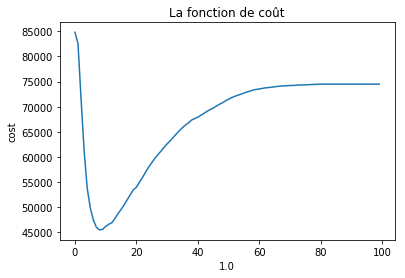

In [27]:
plt.plot(cost_function)
plt.xlabel(i)
plt.ylabel('cost')
plt.title('La fonction de coût')
plt.show()

In [28]:
arr = np.array(cost_function)

In [29]:
min_i = arr.argmin(axis=0)

In [30]:
min_i

8

Donc : min_i = 0.08

In [31]:
y_pred1 = np.where(y_prob>0.08, 1, 0)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     84805
         1.0       0.18      0.71      0.29      7448

    accuracy                           0.72     92253
   macro avg       0.57      0.71      0.56     92253
weighted avg       0.90      0.72      0.78     92253



In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test, y_pred1)
print(cm)

[[61266 23539]
 [ 2193  5255]]


In [34]:
f_score1 = f1_score(y2_test, y_pred1, average='binary')
print(f_score1)

0.2899950333866784


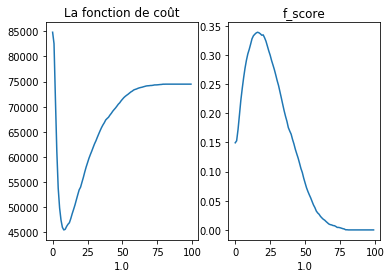

In [35]:
plt.subplot(121),
plt.plot(cost_function),
plt.xlabel(i)
plt.title('La fonction de coût')
plt.subplot(122),
plt.plot(score),
plt.xlabel(i),
plt.title('f_score'),
plt.show()

### Importance des fonctionnalités

In [36]:
#X2= df.drop(['TARGET','SK_ID_CURR','index',  'Unnamed: 0'], axis=1)
feature_list = list(X2_train.columns)
# Get numerical feature importances
importances = list(lg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: EXT_SOURCE_3         Importance: 226
Variable: EXT_SOURCE_2         Importance: 217
Variable: EXT_SOURCE_1         Importance: 214
Variable: PAYMENT_RATE         Importance: 199
Variable: DAYS_BIRTH           Importance: 182
Variable: AMT_ANNUITY          Importance: 121
Variable: ACTIVE_DAYS_CREDIT_MAX Importance: 105
Variable: APPROVED_CNT_PAYMENT_MEAN Importance: 101
Variable: INSTAL_DPD_MEAN      Importance: 90
Variable: PREV_CNT_PAYMENT_MEAN Importance: 88
Variable: ANNUITY_INCOME_PERC  Importance: 83
Variable: DAYS_ID_PUBLISH      Importance: 79
Variable: INSTAL_DAYS_ENTRY_PAYMENT_MAX Importance: 76
Variable: INSTAL_DBD_SUM       Importance: 75
Variable: INSTAL_AMT_PAYMENT_SUM Importance: 75
Variable: ACTIVE_DAYS_CREDIT_ENDDATE_MIN Importance: 73
Variable: DAYS_EMPLOYED        Importance: 72
Variable: INSTAL_AMT_PAYMENT_MIN Importance: 71
Variable: AMT_CREDIT           Importance: 69
Variable: DAYS_REGISTRATION    Importance: 69
Variable: REGION_POPULATION_RELATIVE Impo

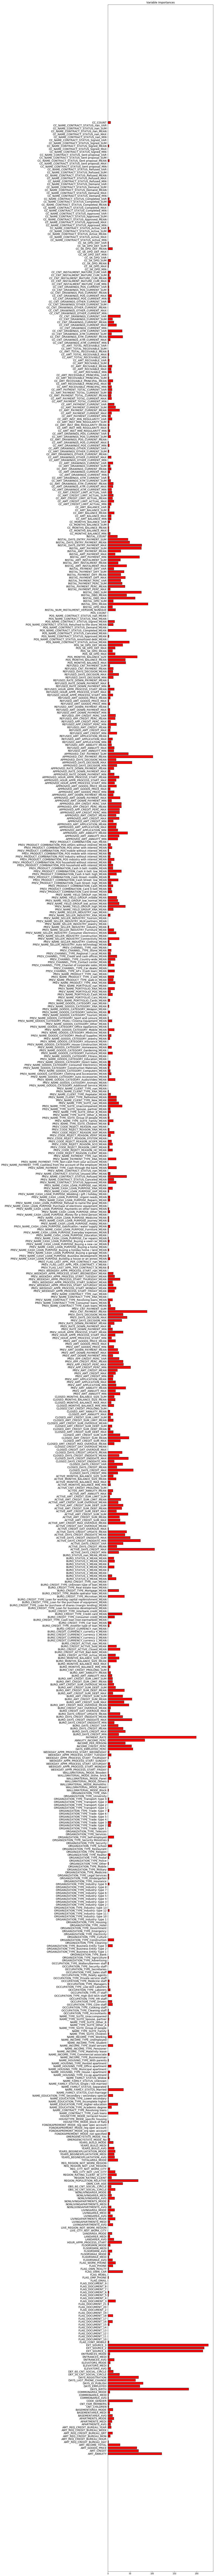

In [37]:
x_values = list(range(len(importances)))
fig, ax = plt.subplots(figsize=(10, 250))
# Make a bar chart
plt.barh(x_values, importances,  color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for y axis
plt.yticks(x_values, feature_list,fontsize = 14)

plt.title('Variable Importances', fontsize = 14);

In [38]:
#X2= df.drop(['TARGET','SK_ID_CURR','index', 'Unnamed: 0'], axis=1)
feature_list = list(X2_train.columns)
# Get numerical feature importances
importances = list(lg.feature_importances_)

# Extract feature importances

feature_importances_domain = pd.DataFrame({'feature': feature_list, 'importance': importances})


In [39]:
df2 = feature_importances_domain.sort_values(by=['importance'], ascending=False)

In [40]:
df2.shape

(795, 2)

In [41]:
df2

,feature,importance
37,EXT_SOURCE_3,226
36,EXT_SOURCE_2,217
35,EXT_SOURCE_1,214
244,PAYMENT_RATE,199
22,DAYS_BIRTH,182
...,...,...
426,PREV_NAME_CASH_LOAN_PURPOSE_Refusal to name th...,0
425,PREV_NAME_CASH_LOAN_PURPOSE_Purchase of electr...,0
422,PREV_NAME_CASH_LOAN_PURPOSE_Money for a third ...,0
419,PREV_NAME_CASH_LOAN_PURPOSE_Hobby_MEAN,0


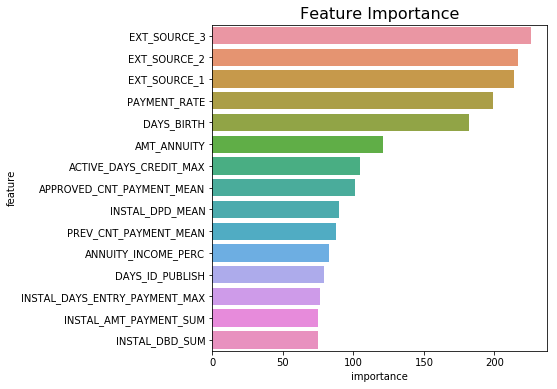

In [42]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Feature Importance', fontsize=16)
sns.barplot(y="feature", x="importance", data=df2.head(15), orient='h')
plt.show()

In [58]:
df2.to_csv(r'D:\Documents\P7\feature_importances.csv')

# SHAP

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


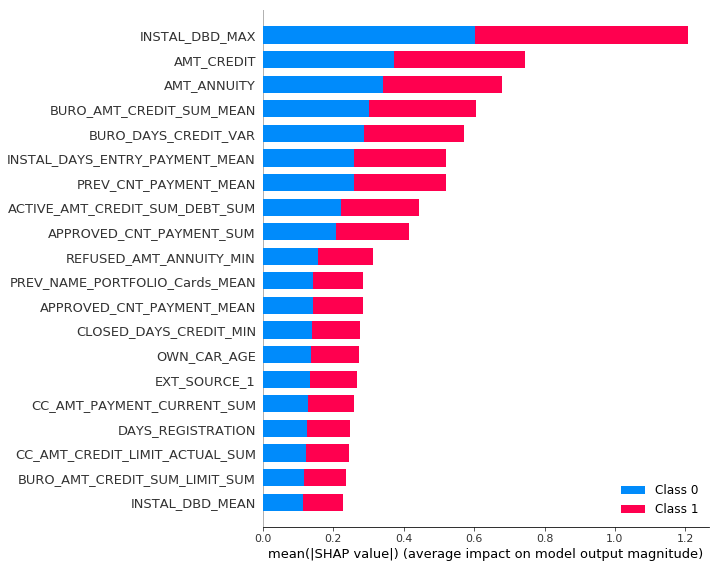

In [37]:
import shap
shap_values = shap.TreeExplainer(lg).shap_values(X2_train)
shap.summary_plot(shap_values, X2_train, plot_type="bar")

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


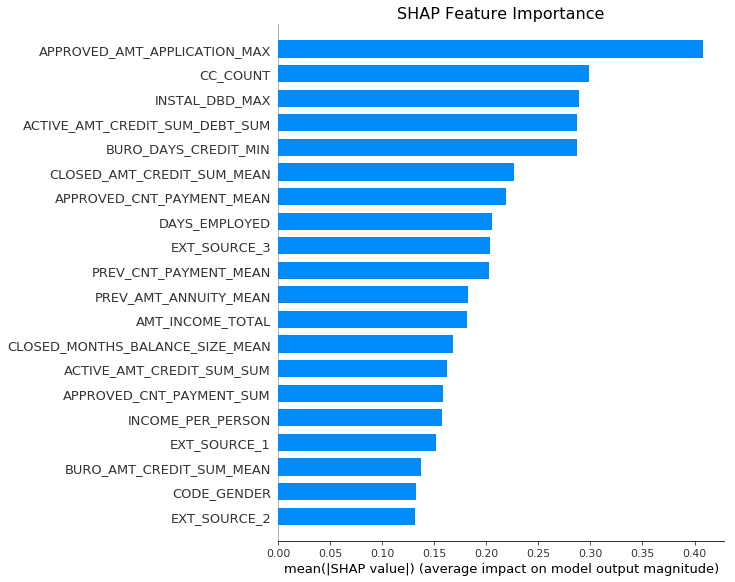

In [43]:
import shap
explainer = shap.TreeExplainer(lg)
shap_values = explainer.shap_values(X2_train)

#np.save('shapValues', np.array(shap_values[0]))
#np.save('shapValues1', np.array(shap_values[1]))

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('SHAP Feature Importance', fontsize=16)
shap.summary_plot(shap_values[0], X2_train, plot_type="bar")
plt.show()

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


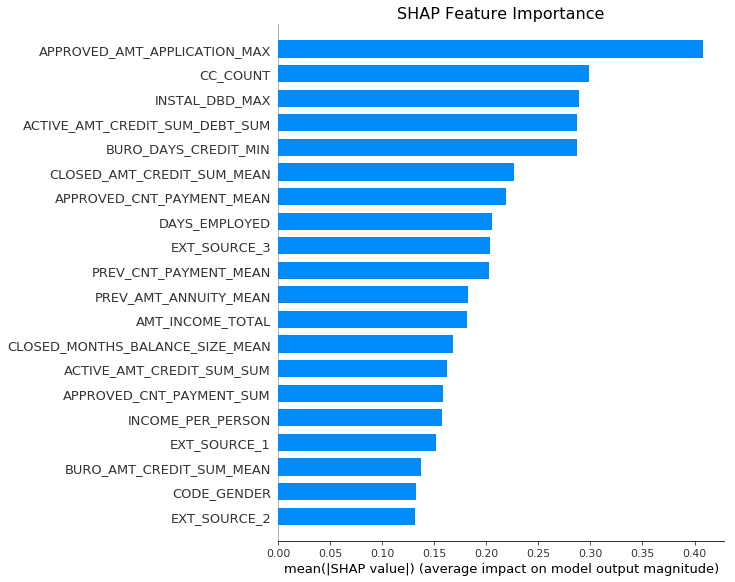

In [44]:
import shap
explainer = shap.TreeExplainer(lg)
shap_values = explainer.shap_values(X2_train)

#np.save('shapValues', np.array(shap_values[0]))
#np.save('shapValues1', np.array(shap_values[1]))

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('SHAP Feature Importance', fontsize=16)
shap.summary_plot(shap_values[1], X2_train, plot_type="bar")
plt.show()

In [55]:
shap.initjs()

# Write in a function
def shap_plot(j):
    p = shap.force_plot(explainer.expected_value[1], (shap_values[1])[j,:], X2_train.iloc[j,:])
    return(p)
shapvalues = shap_values[1]

def reportCustomerFeatures(CustId, NbFeatures = 12):
    
    maxI10 = sorted(range(len(shapvalues[CustId])), key=lambda x: abs(shapvalues[CustId][x]))[-NbFeatures:]
    FeatureNames = np.empty(NbFeatures, dtype=object)
    FeatureShapValues = np.empty(NbFeatures, dtype=float)
    
    for i, Id in enumerate(reversed(maxI10)):
        FeatureNames[i] = X2_train.columns[Id]
        FeatureShapValues[i] = shapvalues[CustId][Id]
        
        print(Id, X2_train.columns[Id], shapvalues[CustId][Id])
    positive = FeatureShapValues > 0
    colors = list(map(lambda x: 'red' if x else 'blue', positive))
    print(colors)
    fig, ax = plt.subplots()
    plt.title("Customer {}'s SHAP Feature Importance".format(CustId), fontsize=16)
    sns.barplot(x=FeatureShapValues, y=FeatureNames, palette=colors)
    plt.show()
    return shap_plot(CustId)



554 APPROVED_AMT_APPLICATION_MAX 0.3974921169156688
323 ACTIVE_AMT_CREDIT_SUM_DEBT_SUM 0.332715947191196
794 CC_COUNT 0.3040496490114045
632 INSTAL_DBD_MAX 0.29058782766213354
245 BURO_DAYS_CREDIT_MIN 0.2521103375953807
578 APPROVED_CNT_PAYMENT_MEAN 0.24422183200603956
37 EXT_SOURCE_3 -0.23788901502865178
207 ORGANIZATION_TYPE_School 0.23651528429837376
346 CLOSED_AMT_CREDIT_SUM_MEAN -0.22306221153985614
363 PREV_AMT_ANNUITY_MEAN -0.20828670863249932
3 AMT_INCOME_TOTAL 0.20662183164112638
359 CLOSED_MONTHS_BALANCE_SIZE_MEAN 0.2051072682257456
['red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'red']


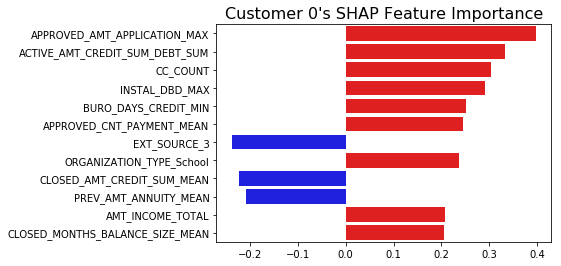

In [56]:
reportCustomerFeatures(0)

554 APPROVED_AMT_APPLICATION_MAX 0.45748556506307575
632 INSTAL_DBD_MAX 0.32712277079227486
794 CC_COUNT 0.289321852114555
245 BURO_DAYS_CREDIT_MIN 0.2807129262960683
242 INCOME_PER_PERSON 0.2249647220871016
346 CLOSED_AMT_CREDIT_SUM_MEAN -0.22120167028952642
578 APPROVED_CNT_PAYMENT_MEAN 0.21667921051364955
389 PREV_CNT_PAYMENT_MEAN 0.2059489515042418
23 DAYS_EMPLOYED -0.1954269272464345
18 CODE_GENDER 0.19480199871262013
37 EXT_SOURCE_3 -0.16682848739646958
72 HOUR_APPR_PROCESS_START 0.15862432469232415
['red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red']


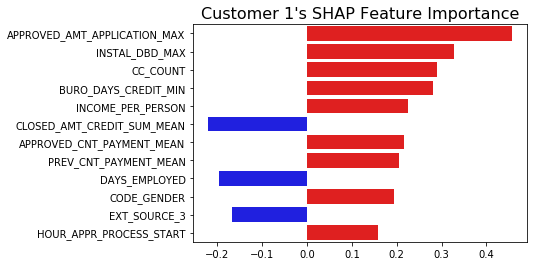

In [57]:
reportCustomerFeatures(1)

In [59]:
shapValues1 = np.load('shapValues1.npy')
np.save("shapValues20K", shapValues1[:2000])

In [49]:

import pandas as pd
import numpy as np
import joblib


Threshold = 0.08

loaded_model = joblib.load('finalized_model.sav')
loaded_X2_test_std = joblib.load('file_X2_test_std.sav')



def score():
    y_predict_proba = loaded_model.predict_proba(loaded_X2_test_std)
    class_predict = np.where(y_predict_proba[:, 1]>best_thresh, 1, 0)
    df_scores = pd.DataFrame(y_predict_proba[:, 1],columns=['proba'])
    df_scores['class'] = class_predict
    return df_scores

In [50]:
df_score = score()

In [52]:
df_score.head()

,proba,class
0,0.069306,0
1,0.050517,0
2,0.049578,0
3,0.062007,0
4,0.056899,0


In [53]:
df_score.to_csv(r'D:\Documents\P7\df_score.csv')

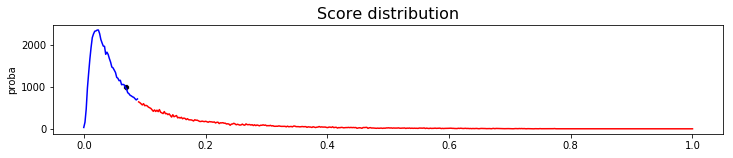

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

NbBins = 500
dist = pd.cut(df_score['proba'], bins=NbBins).value_counts()
dist.sort_index(inplace=True)
ticks = np.linspace(0, 1, NbBins)


Cust = 0
fig, ax = plt.subplots(figsize=(12,2))
plt.title("Score distribution", fontsize=16)
Threshold=int(0.09*len(dist))


sns.lineplot(x=ticks[:Threshold], y=dist[:Threshold], color='blue')
sns.lineplot(x=ticks[Threshold:], y=dist[Threshold:], color='red')
Score = df_score.loc[Cust, 'proba']
rank = int(Score*len(dist))

sns.scatterplot(x=[Score], y=[dist[rank]], color='black')
plt.show()
